# Assignment Seoul Bike

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

## Analisi delle caratteristiche principali del dataset

In [3]:
seoul_bike_dataset: pd.DataFrame = pd.read_csv("./SeoulBikeData.csv")
seoul_bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## Noleggi in data 2017-08-12 [Data, Ora, Totale bici]

In [4]:
day: str = "08/12/2017"
selected_dataset: pd.DataFrame = seoul_bike_dataset[
        ["Date", "Rented Bike Count", "Hour"]][seoul_bike_dataset["Date"] == day]
print(selected_dataset, "\n\n")
total_bycicle: int = selected_dataset[
        (seoul_bike_dataset["Hour"] >= 8) & (seoul_bike_dataset["Hour"] <= 20)]["Rented Bike Count"].sum()
print(f"Totale biciclette in nolo dalle 8 alle 20 dell'8 Feb. 2017: {total_bycicle}")

           Date  Rented Bike Count  Hour
168  08/12/2017                233     0
169  08/12/2017                230     1
170  08/12/2017                131     2
171  08/12/2017                 99     3
172  08/12/2017                 71     4
173  08/12/2017                 84     5
174  08/12/2017                158     6
175  08/12/2017                387     7
176  08/12/2017                780     8
177  08/12/2017                395     9
178  08/12/2017                261    10
179  08/12/2017                310    11
180  08/12/2017                355    12
181  08/12/2017                354    13
182  08/12/2017                350    14
183  08/12/2017                362    15
184  08/12/2017                401    16
185  08/12/2017                500    17
186  08/12/2017                752    18
187  08/12/2017                477    19
188  08/12/2017                384    20
189  08/12/2017                336    21
190  08/12/2017                347    22
191  08/12/2017 

## Grafici

Mostra quanti noleggi sono stati registrati ogni ora dell'8 Febbraio 2017 a Seoul, le 8 e le 18 sono le ore più popolari.

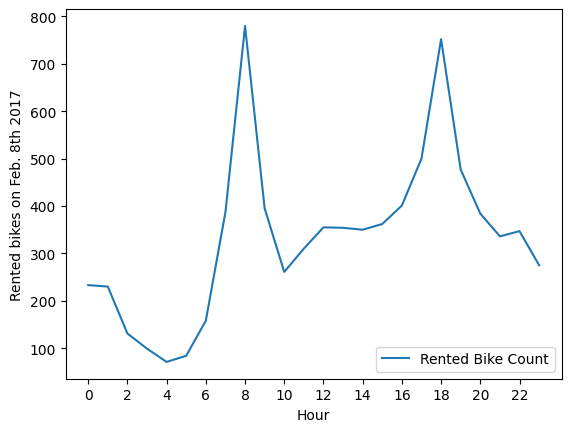

In [5]:
selected_dataset.plot(y="Rented Bike Count", x = "Hour", xticks=range(0,24,2), ylabel="Rented bikes on Feb. 8th 2017")
plt.show()

1. Il primo grafico mette in relazione le stagioni con i noleggi, mostrando come in estate vi sia un picco nei noleggi a differenza dell'inverno che è il mese con meno noli registrati.
2. Il secondo grafico mette in relazione i mesi dell'anno con i noleggi, per dare un ulteriore conferma di quanto osservato dal grafico precedente e non solo; da questo grafico concludiamo che Giugno è il mese con più noli del biennio.

         Rented Bike Count  Hour  Temperature(�C)  Humidity(%)  \
Seasons                                                          
Autumn          819.597985  11.5        14.120833    59.228480   
Spring          730.031250  11.5        13.046694    58.776721   
Summer         1034.073370  11.5        26.582790    64.981431   
Winter          225.541204  11.5        -2.540463    49.744907   

         Wind speed (m/s)  Visibility (10m)  Dew point temperature(�C)  \
Seasons                                                                  
Autumn           1.494734       1560.752289                   5.498718   
Spring           1.874592       1240.364583                   4.120063   
Summer           1.609420       1501.745471                  18.750136   
Winter           1.922685       1445.987037                 -12.416667   

         Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
Seasons                                                        
Autumn                  0.5218

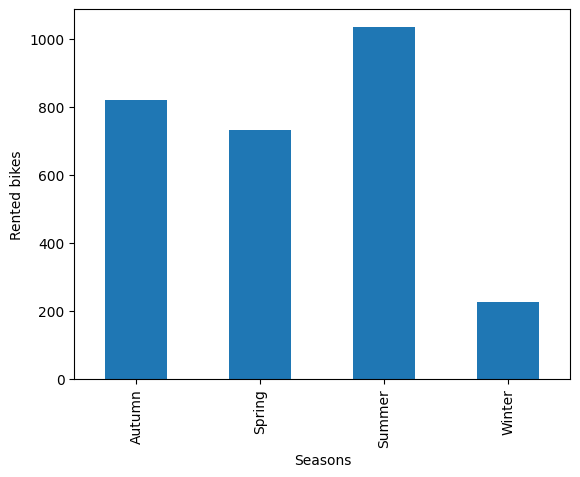

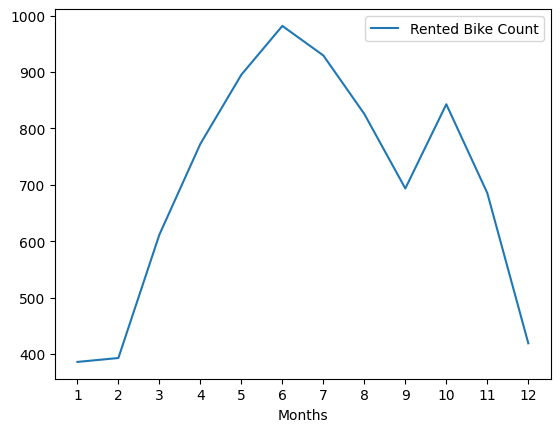

In [6]:
# figure 1
df_by_season = seoul_bike_dataset.groupby(by="Seasons").mean()
df_by_season["Rented Bike Count"].plot(kind = "bar", ylabel="Rented bikes")

# figure 2
df_by_date = seoul_bike_dataset[["Date", "Rented Bike Count"]]
df_by_date.index = pd.to_datetime(df_by_date["Date"])
df_by_date = df_by_date.groupby(by=[df_by_date.index.month]).mean()
df_by_date.plot(xlabel="Months", xticks=range(1,13))
plt.show()